In [301]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [302]:
traindf = pd.read_csv("train.csv")
testdf = pd.read_csv("test.csv")

In [303]:
traindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [304]:
traindf['has_cabin'] = traindf['Cabin'].notna().astype(int)
traindf.drop("Cabin",axis=1,inplace=True)

testdf['has_cabin'] = testdf['Cabin'].notna().astype(int)
testdf.drop("Cabin",axis=1,inplace=True)

In [305]:
traindf.loc[ traindf['Fare'] <= 7.91, 'Fare'] = 0
traindf.loc[(traindf['Fare'] > 7.91) & (traindf['Fare'] <= 14.454), 'Fare'] = 1
traindf.loc[(traindf['Fare'] > 14.454) & (traindf['Fare'] <= 31), 'Fare']   = 2
traindf.loc[ traindf['Fare'] > 31, 'Fare'] 	= 3

testdf.loc[ testdf['Fare'] <= 7.91, 'Fare'] = 0
testdf.loc[(testdf['Fare'] > 7.91) & (testdf['Fare'] <= 14.454), 'Fare'] = 1
testdf.loc[(testdf['Fare'] > 14.454) & (testdf['Fare'] <= 31), 'Fare']   = 2
testdf.loc[ testdf['Fare'] > 31, 'Fare'] 	= 3

In [306]:
traindf.loc[ traindf['Age'] <= 16, 'Age'] 					       = 0
traindf.loc[(traindf['Age'] > 16) & (traindf['Age'] <= 32), 'Age'] = 1
traindf.loc[(traindf['Age'] > 32) & (traindf['Age'] <= 48), 'Age'] = 2
traindf.loc[(traindf['Age'] > 48) & (traindf['Age'] <= 64), 'Age'] = 3
traindf.loc[ traindf['Age'] > 64, 'Age']  



33     66.0
54     65.0
96     71.0
116    70.5
280    65.0
456    65.0
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64

In [307]:
traindf.drop("Ticket",axis=1,inplace=True)
testdf.drop("Ticket",axis=1,inplace=True)

In [308]:
traindf['FamilySize'] = traindf['SibSp'] + traindf['Parch'] + 1
testdf['FamilySize'] = testdf['SibSp'] + testdf['Parch'] + 1

traindf["is_alone"] = traindf["FamilySize"] == 1
testdf["is_alone"] = testdf["FamilySize"] == 1

In [309]:
traindf.drop("FamilySize",axis=1,inplace=True)
testdf.drop("FamilySize",axis=1,inplace=True)

traindf.drop("SibSp",axis=1,inplace=True)
testdf.drop("SibSp",axis=1,inplace=True)

traindf.drop("Parch",axis=1,inplace=True)
testdf.drop("Parch",axis=1,inplace=True)

In [310]:
traindf["Embarked"].fillna("S",inplace=True)

/var/folders/jb/t70v0shj6cv_h7yd_f6lg0400000gn/T/ipykernel_9031/2403040050.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  traindf["Embarked"].fillna("S",inplace=True)


In [311]:
traindf['Embarked'] = traindf['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
testdf['Embarked'] = testdf['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [312]:
traindf['Title'] = traindf['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
common_titles = ['Mr', 'Mrs', 'Master', 'Miss']
traindf['Title'] = traindf['Title'].apply(lambda title: title if title in common_titles else 'Other')

In [313]:
testdf['Title'] = testdf['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
common_titles = ['Mr', 'Mrs', 'Master', 'Miss']
testdf['Title'] = testdf['Title'].apply(lambda title: title if title in common_titles else 'Other')

In [314]:
traindf.drop("Name",axis=1,inplace=True)
testdf.drop("Name",axis=1,inplace=True)

In [315]:
traindf['Sex'] = traindf['Sex'].map( {"male":1,"female":0} ).astype(int)
testdf['Sex'] = testdf['Sex'].map( {"male":1,"female":0} ).astype(int)

In [316]:
traindf.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
Fare             0
Embarked         0
has_cabin        0
is_alone         0
Title            0
dtype: int64

In [317]:
traindf = pd.get_dummies(traindf, columns=['Title'])
traindf.drop("Title_Other",axis=1,inplace=True)
traindf.drop("PassengerId",axis=1,inplace=True)

testdf = pd.get_dummies(testdf, columns=['Title'])
testdf.drop("Title_Other",axis=1,inplace=True)

In [318]:
from sklearn.ensemble import RandomForestRegressor

age_known = traindf[traindf['Age'].notnull()]
age_unknown = traindf[traindf['Age'].isnull()]

features = age_known.drop(columns=['Age'])  # Features excluding 'Age'
target = age_known['Age']                    # Target variable

model = RandomForestRegressor(random_state=42)
model.fit(features, target)

# Step 5: Predict missing ages
predicted_ages = model.predict(age_unknown.drop(columns=['Age']))

# Step 6: Fill in the missing ages in the original DataFrame
traindf.loc[traindf['Age'].isnull(), 'Age'] = predicted_ages

In [319]:
traindf.loc[ traindf['Age'] <= 16, 'Age'] 					       = 0
traindf.loc[(traindf['Age'] > 16) & (traindf['Age'] <= 32), 'Age'] = 1
traindf.loc[(traindf['Age'] > 32) & (traindf['Age'] <= 48), 'Age'] = 2
traindf.loc[(traindf['Age'] > 48) & (traindf['Age'] <= 64), 'Age'] = 3
traindf.loc[ traindf['Age'] > 64, 'Age'] = 4



In [320]:
traindf

,Survived,Pclass,Sex,Age,Fare,Embarked,has_cabin,is_alone,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,0,3,1,0.0,0.0,0,0,False,False,False,True,False
1,1,1,0,0.0,3.0,1,1,False,False,False,False,True
2,1,3,0,0.0,1.0,0,0,True,False,True,False,False
3,1,1,0,0.0,3.0,0,1,False,False,False,False,True
4,0,3,1,0.0,1.0,0,0,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0.0,1.0,0,0,True,False,False,False,False
887,1,1,0,0.0,2.0,0,1,True,False,True,False,False
888,0,3,0,0.0,2.0,0,0,False,False,True,False,False
889,1,1,1,0.0,2.0,1,1,True,False,False,True,False


In [321]:
from sklearn.metrics import accuracy_score, classification_report

def see_accuracy(model):
    # Use the model to predict on the test data
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    
    
    
    return accuracy  # Return the accuracy for further use

def display_cr(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_pred=y_pred,y_true=y_test))


In [322]:
from sklearn.model_selection import train_test_split

X = traindf.drop("Survived",axis=1)
y = traindf["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [323]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np

l1_ratio = np.linspace(0, 1, 20)

# Define parameter grid with compatible combinations
param_grid_lr = [
    {'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear']},
    {'penalty': ['l2'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['lbfgs', 'newton-cg']},
    {'penalty': ['elasticnet'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['saga'], 'l1_ratio': l1_ratio},
]

# Set up Grid Search
grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                          'solver': ['liblinear']},
                         {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2'],
                          'solver': ['lbfgs', 'newton-cg']},
                         {'C': [0.01, 0.1, 1, 10, 100],
                          'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                          'penalty': ['elasticnet'], 'solver': ['saga']}],
             scoring='accuracy')

In [324]:
from sklearn.svm import SVC

# Define parameter grid
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [325]:
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [326]:
from xgboost import XGBClassifier

# Define parameter grid
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0]
}

grid_search_xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='accuracy')

In [327]:
from sklearn.ensemble import AdaBoostClassifier

# Define parameter grid
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0]
}

grid_search_ada = GridSearchCV(AdaBoostClassifier(), param_grid_ada, cv=5, scoring='accuracy')
grid_search_ada.fit(X_train, y_train)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [328]:
from sklearn.ensemble import GradientBoostingClassifier

# Define parameter grid
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search_gb = GridSearchCV(GradientBoostingClassifier(), param_grid_gb, cv=5, scoring='accuracy')
grid_search_gb.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [329]:
from catboost import CatBoostClassifier

# Define parameter grid
param_grid_cb = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8]
}

grid_search_cb = GridSearchCV(CatBoostClassifier(verbose=0), param_grid_cb, cv=5, scoring='accuracy')
grid_search_cb.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x159a16de0>,
             param_grid={'depth': [4, 6, 8], 'iterations': [100, 200, 300],
                         'learning_rate': [0.01, 0.1, 0.2]},
             scoring='accuracy')

In [330]:
from sklearn.neighbors import KNeighborsClassifier

# Define parameter grid
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [331]:
model_names = [
    "KNeighborsClassifier",
    "LogisticRegression",
    "SVC",
    "RandomForestClassifier",
    "XGBClassifier",
    "CatBoostClassifier",
    "AdaBoostClassifier",
    "GradientBoostingClassifier"
]

models = [grid_search_knn, grid_search_lr, grid_search_svm, grid_search_rf, grid_search_xgb, grid_search_cb, grid_search_ada, grid_search_gb]

for name, model in zip(model_names, models):
    accuracy = see_accuracy(model)  # Now this returns the accuracy
    print(f"Accuracy of {name}: {accuracy:.4f}")


Accuracy of KNeighborsClassifier: 0.8101
Accuracy of LogisticRegression: 0.7989
Accuracy of SVC: 0.7989
Accuracy of RandomForestClassifier: 0.7933
Accuracy of XGBClassifier: 0.8101
Accuracy of CatBoostClassifier: 0.8156
Accuracy of AdaBoostClassifier: 0.8101
Accuracy of GradientBoostingClassifier: 0.8156


In [332]:
display_cr(grid_search_knn)
display_cr(grid_search_lr)
display_cr(grid_search_svm)


              precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       105
           1       0.76      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       105
           1       0.81      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [333]:
display_cr(grid_search_rf)
display_cr(grid_search_xgb)
display_cr(grid_search_cb)


              precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.83      0.68      0.75        74

    accuracy                           0.81       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



In [334]:
display_cr(grid_search_ada)
display_cr(grid_search_gb)

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       105
           1       0.76      0.78      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.81      0.81      0.81       179

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.84      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



In [335]:
def plot_feature_importances(model_estimator):
    model = model_estimator.best_estimator_

    # Get feature importances
    model_importances = model.feature_importances_

    plt.figure(figsize=(10, 6))
    plt.bar(range(X_train.shape[1]), model_importances[indices], align="center")
    plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
    plt.xlim([-1, X_train.shape[1]])
    plt.show()

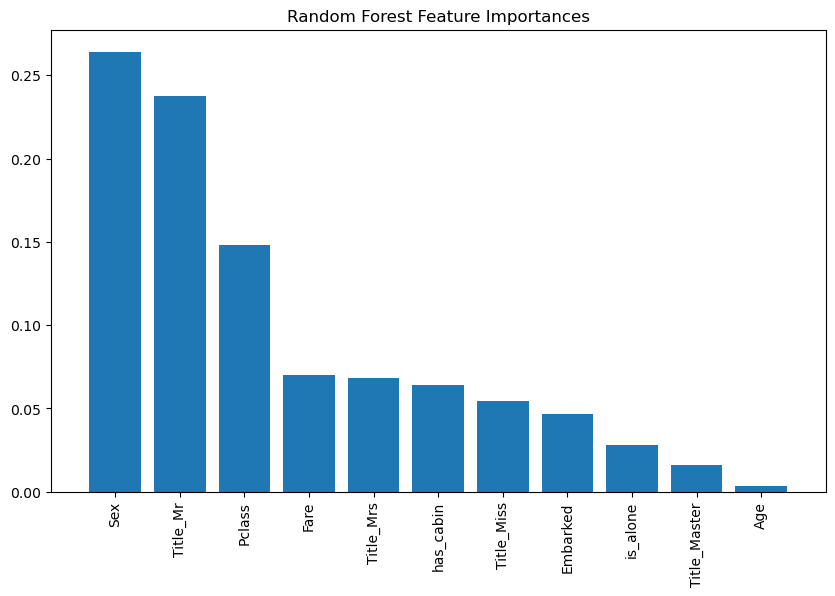

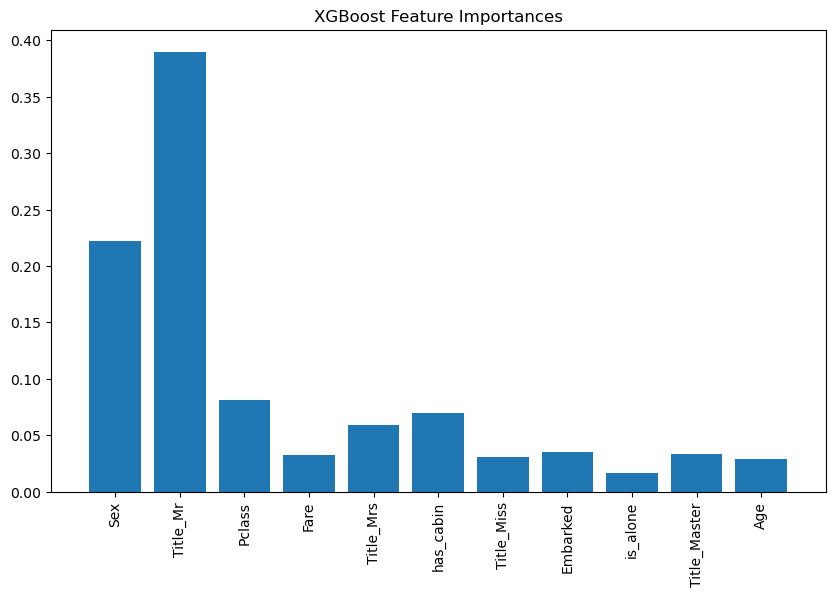

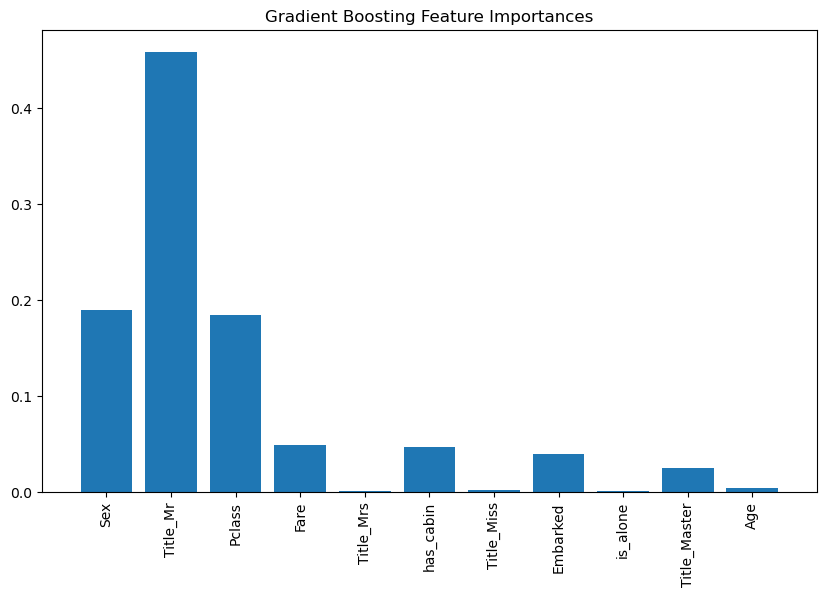

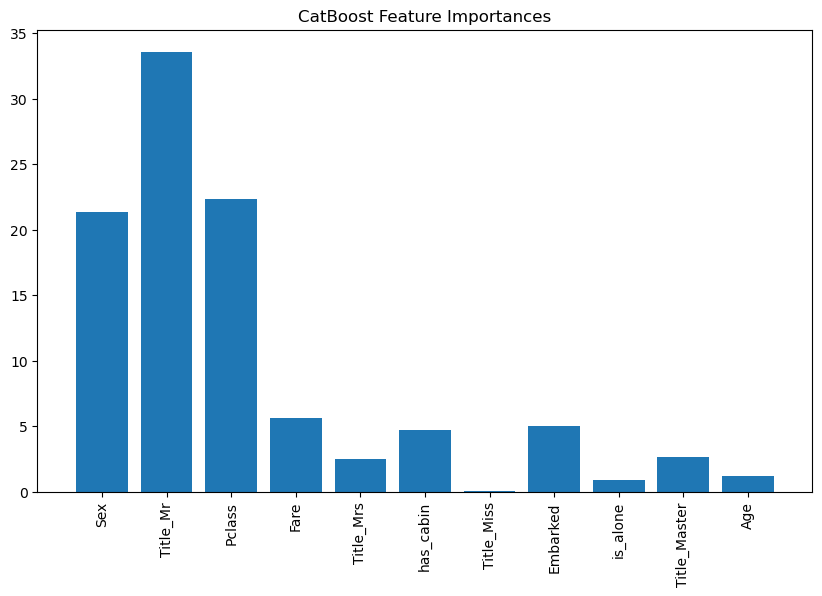

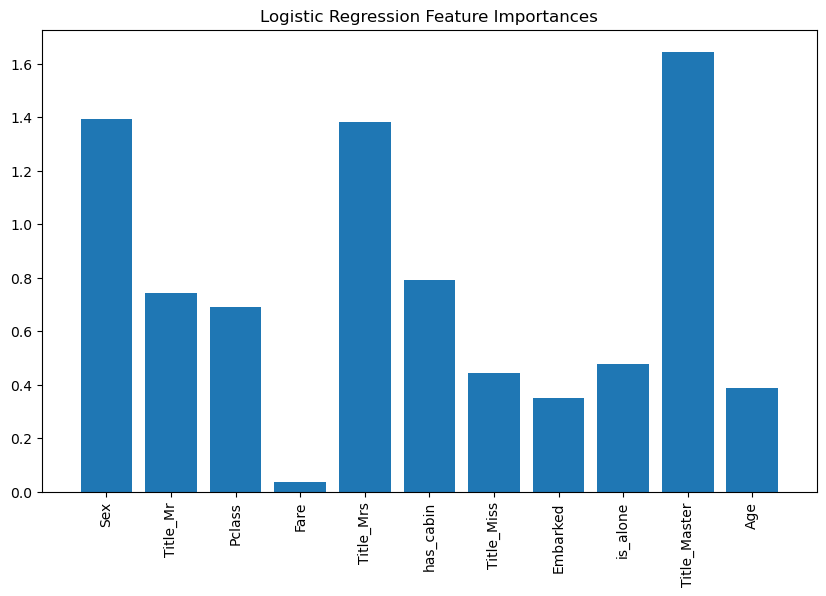

In [336]:

rf_model = grid_search_rf.best_estimator_

# Get feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Random Forest Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()



xgb_model = grid_search_xgb.best_estimator_

# Get feature importances
xgb_importances = xgb_model.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("XGBoost Feature Importances")
plt.bar(range(X_train.shape[1]), xgb_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


gb_model = grid_search_gb.best_estimator_

# Get feature importances
gb_importances = gb_model.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Gradient Boosting Feature Importances")
plt.bar(range(X_train.shape[1]), gb_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


cb_model = grid_search_cb.best_estimator_

# Get feature importances
cb_importances = cb_model.get_feature_importance()

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("CatBoost Feature Importances")
plt.bar(range(X_train.shape[1]), cb_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


lr_model = grid_search_lr.best_estimator_

# Get coefficients
lr_importances = np.abs(lr_model.coef_[0])

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Logistic Regression Feature Importances")
plt.bar(range(X_train.shape[1]), lr_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()





In [337]:
from sklearn.svm import SVC

# Define parameter grid
param_grid_svm = {
    'C': [1,3,5,10,30,50, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 3, 5, 10, 30, 50, 100],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [338]:
see_accuracy(grid_search_svm)

0.7988826815642458

In [339]:
grid_search_svm.best_params_

{'C': 5, 'gamma': 'scale', 'kernel': 'rbf'}

In [340]:
passenger_ids = testdf['PassengerId']
testdf.drop("PassengerId",axis=1,inplace=True)

In [341]:
testdf["Fare"].fillna(testdf["Fare"].mode()[0], inplace=True)

/var/folders/jb/t70v0shj6cv_h7yd_f6lg0400000gn/T/ipykernel_9031/2156086819.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  testdf["Fare"].fillna(testdf["Fare"].mode()[0], inplace=True)


In [342]:


age_known = testdf[testdf['Age'].notnull()]
age_unknown = testdf[testdf['Age'].isnull()]

features = age_known.drop(columns=['Age'])  # Features excluding 'Age'
target = age_known['Age']                    # Target variable

model = RandomForestRegressor(random_state=42)
model.fit(features, target)

# Step 5: Predict missing ages
predicted_ages = model.predict(age_unknown.drop(columns=['Age']))

# Step 6: Fill in the missing ages in the original DataFrame
testdf.loc[testdf['Age'].isnull(), 'Age'] = predicted_ages

In [343]:
testdf.loc[ testdf['Age'] <= 16, 'Age'] 					       = 0
testdf.loc[(testdf['Age'] > 16) & (testdf['Age'] <= 32), 'Age'] = 1
testdf.loc[(testdf['Age'] > 32) & (testdf['Age'] <= 48), 'Age'] = 2
testdf.loc[(testdf['Age'] > 48) & (testdf['Age'] <= 64), 'Age'] = 3
testdf.loc[ testdf['Age'] > 64, 'Age']   

81    67.0
96    76.0
Name: Age, dtype: float64

In [344]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 331 to 102
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pclass        712 non-null    int64  
 1   Sex           712 non-null    int64  
 2   Age           712 non-null    float64
 3   Fare          712 non-null    float64
 4   Embarked      712 non-null    int64  
 5   has_cabin     712 non-null    int64  
 6   is_alone      712 non-null    bool   
 7   Title_Master  712 non-null    bool   
 8   Title_Miss    712 non-null    bool   
 9   Title_Mr      712 non-null    bool   
 10  Title_Mrs     712 non-null    bool   
dtypes: bool(5), float64(2), int64(4)
memory usage: 42.4 KB


In [345]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pclass        418 non-null    int64  
 1   Sex           418 non-null    int64  
 2   Age           418 non-null    float64
 3   Fare          418 non-null    float64
 4   Embarked      418 non-null    int64  
 5   has_cabin     418 non-null    int64  
 6   is_alone      418 non-null    bool   
 7   Title_Master  418 non-null    bool   
 8   Title_Miss    418 non-null    bool   
 9   Title_Mr      418 non-null    bool   
 10  Title_Mrs     418 non-null    bool   
dtypes: bool(5), float64(2), int64(4)
memory usage: 21.8 KB


In [346]:
testdf.isna().sum()

Pclass          0
Sex             0
Age             0
Fare            0
Embarked        0
has_cabin       0
is_alone        0
Title_Master    0
Title_Miss      0
Title_Mr        0
Title_Mrs       0
dtype: int64

In [347]:
testdf

,Pclass,Sex,Age,Fare,Embarked,has_cabin,is_alone,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,3,1,2.0,0.0,2,0,True,False,False,True,False
1,3,0,2.0,0.0,0,0,False,False,False,False,True
2,2,1,3.0,1.0,2,0,True,False,False,True,False
3,3,1,1.0,1.0,0,0,True,False,False,True,False
4,3,0,1.0,1.0,0,0,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
413,3,1,1.0,1.0,0,0,True,False,False,True,False
414,1,0,2.0,3.0,1,1,True,False,False,False,False
415,3,1,2.0,0.0,0,0,True,False,False,True,False
416,3,1,1.0,1.0,0,0,True,False,False,True,False


In [348]:

predictions_cb = grid_search_cb.predict(testdf)


In [349]:






submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': predictions_cb
})
submission.to_csv('submission_cb.csv', index=False)



